## Exercice

L’objectif de cet exercice est d’analyser les prix des Diamonds en fonction de leurs
caractéristiques. Nous disposons d’un fichier diamonds.csv dans la description est la suivante
(https://ggplot2.tidyverse.org/reference/diamonds.html#format )
- Price : price in US dollars (\$326--\$18,823)
- Carat : weight of the diamond (0.2--5.01)
- Cut : quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- Color : diamond colour, from J (worst) to D (best)
- Clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1,
- IF (best))
- x : length in mm (0--10.74)
- y : width in mm (0--58.9)
- z : depth in mm (0--31.8)
- depth : total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- table : width of top of diamond relative to widest point (43--95)


A partir du fichier diamonds.csv fourni, analyser les données suivant le déroulement classique

    - Description de chaque variable
    - Recherche des liens entre le prix (price) et les autres variables

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb

In [6]:
data= pd.read_csv("diamonds.csv", sep=",")
data.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

# Question 1

In [7]:
data.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

# Question 2

C:\Users\LNQP1128\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


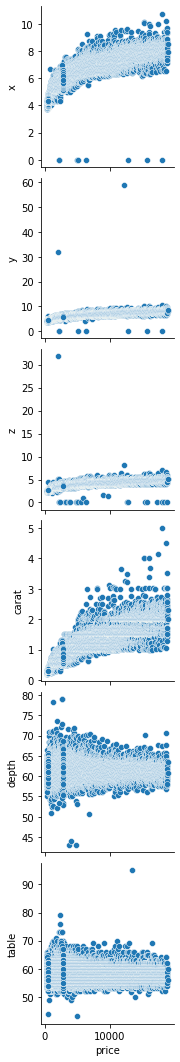

In [8]:
sb.pairplot(data, y_vars=['x', 'y','z','carat','depth','table'], 
             x_vars='price', size=2.5, aspect=1, kind='scatter')
plt.show()

À vue d'oeil, il y a une relation entre le prix et le carat de même entre le prix et la longueur du diamant. Ce qui est normal, car plus le diamant est long, plus le nombre de carat augmente ainsi que le prix

Confirmons nos hypothèse grace aux corrélations sur une heatmap

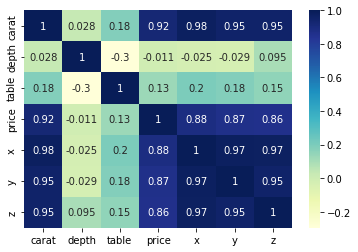

In [10]:
sb.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

Nous constatons qu'il y a réelement une forte corrélation entre prix et le nombre de carat ainsi que la taille du diamant

Application la regression linéaire simple en utilisant le carat comme variable de fonction

In [25]:
#Création de x et y
X=data["price"]
y=data["carat"]

Création des ensembles d'entrainement et de test

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [31]:
X_train
y_train

29477    0.32
52542    0.72
8725     0.38
15577    1.00
19651    1.70
         ... 
16304    1.07
79       0.26
12119    0.91
14147    1.25
38408    0.35
Name: carat, Length: 37758, dtype: float64

Construction et entrainement du modèle

In [32]:
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [33]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const    0.366973
price    0.000109
dtype: float64

In [34]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  carat   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                 2.146e+05
Date:                Thu, 17 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:21:18   Log-Likelihood:                 10374.
No. Observations:               37758   AIC:                        -2.074e+04
Df Residuals:                   37756   BIC:                        -2.073e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3670      0.001    276.241      0.000       0.364       0.370
price          0.0001   2.36e-07    463.264      0.000       0.000       0.000
==============================================================================
Omnibus:                     7556.141   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           102136.044
Skew:                           0.578   Prob(JB):                         0.00
Kurtosis:                      10.974   Cond. No.                     7.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Visaualisation

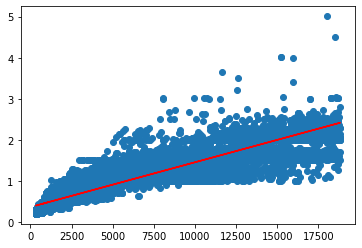

In [35]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 0.366973 + 0.000109*X_train, 'r')
plt.show()

Analyse risiduelle

In [36]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

Histogramme des residus

C:\Users\LNQP1128\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


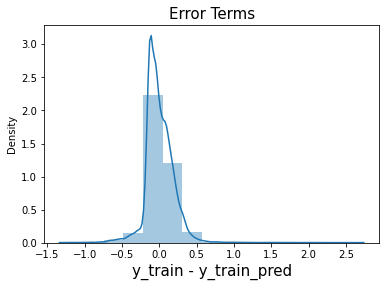

In [37]:
# Plotting the histogram using the residual values
fig = plt.figure()
sb.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

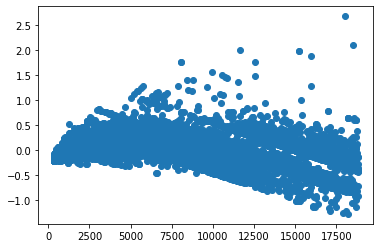

In [38]:
# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.show()

Prédiction

In [39]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

52264    0.639543
21073    1.378908
42161    0.507471
35974    0.467751
7641     0.833986
           ...   
10135    0.883554
1637     0.697099
43518    0.522790
33364    0.457465
1319     0.690643
Length: 16182, dtype: float64

In [41]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.8467895446772485

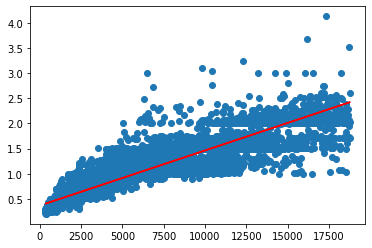

In [43]:
# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()